In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)

2024-02-17 16:11:08.359256: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-17 16:11:08.359486: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-17 16:11:08.360773: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-17 16:11:08.509445: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-17 16:11:10.599634: W tensorflow/compiler/

2.14.0


In [3]:
from tensorflow.keras.preprocessing.image import load_img

In [4]:
img = load_img('clothing-dataset-small/test/t-shirt/0af4203f-8998-4719-92fe-65c14a6b6093.jpg', target_size=(299, 299))

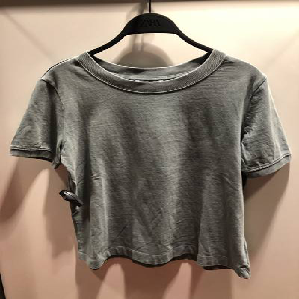

In [5]:
img

In [6]:
x = np.array(img)
x.shape

(299, 299, 3)

In [7]:
x

array([[[ 69,  51,  37],
        [ 68,  50,  36],
        [ 67,  49,  35],
        ...,
        [195, 171, 147],
        [195, 171, 147],
        [195, 171, 147]],

       [[ 69,  51,  37],
        [ 68,  50,  36],
        [ 67,  49,  35],
        ...,
        [216, 192, 166],
        [216, 192, 166],
        [216, 192, 166]],

       [[ 69,  51,  37],
        [ 68,  50,  36],
        [ 67,  49,  35],
        ...,
        [236, 212, 184],
        [236, 212, 184],
        [236, 212, 184]],

       ...,

       [[ 36,  22,  11],
        [ 33,  26,  18],
        [ 25,  20,  16],
        ...,
        [192, 158, 130],
        [191, 157, 129],
        [190, 156, 128]],

       [[ 39,  25,  14],
        [ 32,  25,  17],
        [ 25,  20,  16],
        ...,
        [192, 158, 130],
        [191, 157, 129],
        [190, 156, 128]],

       [[ 40,  26,  15],
        [ 33,  26,  18],
        [ 25,  20,  16],
        ...,
        [192, 158, 130],
        [191, 157, 129],
        [190, 156, 128]]

## Pre trained CNN

In [8]:
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions

In [9]:
model = Xception(weights='imagenet', input_shape=(299, 299, 3))

2024-02-17 16:11:13.622950: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-17 16:11:14.818898: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-17 16:11:14.818986: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-17 16:11:14.842745: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-02-17 16:11:14.843010: I tensorflow/compile

In [10]:
X = preprocess_input(x.reshape(1, 299, 299, 3))

In [11]:
pred = model.predict(X)

2024-02-17 16:11:20.012252: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8904
2024-02-17 16:11:20.262112: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-02-17 16:11:21.219041: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


1/1 [==============================] - 3s 3s/step


In [12]:
decode_predictions(pred)

[[('n03595614', 'jersey', 0.8173055),
  ('n04370456', 'sweatshirt', 0.02585065),
  ('n03980874', 'poncho', 0.017336788),
  ('n02963159', 'cardigan', 0.009998944),
  ('n04599235', 'wool', 0.006442688)]]

In [13]:
def give_top_3(path_to_image):
    img = load_img(path_to_image, target_size=(299, 299))
    x = np.array(img)
    X = preprocess_input(x.reshape(1, 299, 299, 3))
    pred = model.predict(X)
    return decode_predictions(pred, top=3)[0]

give_top_3('clothing-dataset-small/train/shoes/1ece3817-f6ca-46a2-b514-f2d3de572399.jpg')

1/1 [==============================] - 0s 45ms/step


[('n04120489', 'running_shoe', 0.33427215),
 ('n03680355', 'Loafer', 0.30134588),
 ('n04254777', 'sock', 0.057897456)]

## Transfer learning

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [15]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [16]:
"""
Load and preprocess the training dataset.

Args:
    train_gen (DirectoryIterator): Directory iterator for the training dataset.
    target_size (tuple): The desired size of the image after resizing.
    batch_size (int): The number of samples per batch.

Returns:
    train_ds (DirectoryIterator): Directory iterator for the preprocessed training dataset.
"""
train_ds = train_gen.flow_from_directory('clothing-dataset-small/train/', target_size=(150, 150), batch_size=32)

Found 3068 images belonging to 10 classes.


In [17]:
train_ds.class_indices

{'dress': 0,
 'hat': 1,
 'longsleeve': 2,
 'outwear': 3,
 'pants': 4,
 'shirt': 5,
 'shoes': 6,
 'shorts': 7,
 'skirt': 8,
 't-shirt': 9}

In [18]:
"""
This line of code retrieves the next batch of data from the train dataset.

Parameters:
- train_ds: The train dataset.

Returns:
- X: The input data of the next batch.
- y: The target labels of the next batch.
"""

X, y = next(train_ds)

In [19]:
y[:5]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [20]:
val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory('clothing-dataset-small/validation/', target_size=(150, 150), batch_size=32)

Found 341 images belonging to 10 classes.


In [21]:
"""
This code initializes a base model using the Xception architecture for image classification.
The model is pre-trained on the ImageNet dataset and has its top layer (fully connected layer) excluded.
The input shape of the model is set to (150, 150, 3), which represents the dimensions of the input images.
The base model is set to be non-trainable, meaning its weights will not be updated during training.
"""
base_model = Xception(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

base_model.trainable = False

In [22]:
"""
This code defines a Keras model for clothes classification.

Parameters:
- inputs: The input tensor of shape (batch_size, 150, 150, 3).

Returns:
- model: A Keras Model object that takes inputs of shape (150, 150, 3) and outputs the vectors obtained from the base model.

Example usage:
inputs = keras.Input(shape=(150, 150, 3))
model = create_model(inputs)
"""
inputs = keras.Input(shape=(150, 150, 3))

base = base_model(inputs)

vectors = keras.layers.GlobalAveragePooling2D()(base)

outputs = keras.layers.Dense(10)(vectors)

model = keras.Model(inputs, outputs)

In [23]:
preds = model.predict(X)

1/1 [==============================] - 3s 3s/step


In [24]:
preds.shape

(32, 10)

In [25]:
preds[0]

array([ 1.1673731 , -0.40691233,  0.3108085 ,  0.03595611, -0.45156905,
        0.84450614, -0.670239  , -0.09782295,  0.9885098 , -0.16321035],
      dtype=float32)

### Optimising the model

In [26]:
learning_rate = 0.01
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

loss = keras.losses.CategoricalCrossentropy(from_logits=True)

In [27]:
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [28]:
history = model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10


2024-02-17 16:11:36.650120: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f61b9d73fe0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-02-17 16:11:36.650215: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce GTX 1650, Compute Capability 7.5
2024-02-17 16:11:36.734700: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.


 1/96 [..............................] - ETA: 5:51 - loss: 2.5435 - accuracy: 0.0625

2024-02-17 16:11:37.230096: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


96/96 [==============================] - 38s 361ms/step - loss: 1.2400 - accuracy: 0.6741 - val_loss: 0.8758 - val_accuracy: 0.7625
Epoch 2/10
96/96 [==============================] - 29s 300ms/step - loss: 0.5330 - accuracy: 0.8220 - val_loss: 0.9508 - val_accuracy: 0.7683
Epoch 3/10
96/96 [==============================] - 31s 319ms/step - loss: 0.3284 - accuracy: 0.8889 - val_loss: 0.9153 - val_accuracy: 0.8094
Epoch 4/10
96/96 [==============================] - 29s 296ms/step - loss: 0.2271 - accuracy: 0.9188 - val_loss: 0.9277 - val_accuracy: 0.7771
Epoch 5/10
96/96 [==============================] - 32s 329ms/step - loss: 0.1595 - accuracy: 0.9443 - val_loss: 0.8378 - val_accuracy: 0.8328
Epoch 6/10
96/96 [==============================] - 28s 288ms/step - loss: 0.1271 - accuracy: 0.9606 - val_loss: 0.9375 - val_accuracy: 0.7918
Epoch 7/10
96/96 [==============================] - 28s 288ms/step - loss: 0.1218 - accuracy: 0.9553 - val_loss: 0.9220 - val_accuracy: 0.8006
Epoch 8/10

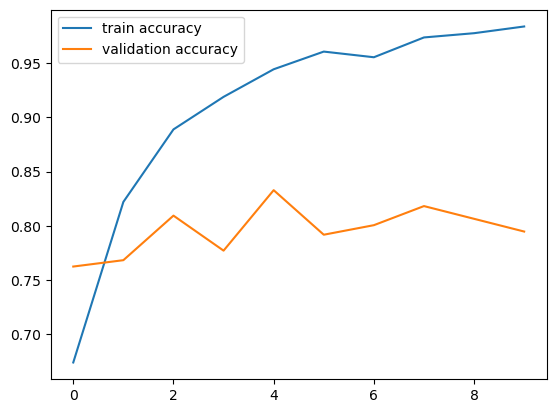

In [29]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

plt.plot(train_accuracy, label='train accuracy')
plt.plot(val_accuracy, label='validation accuracy')
plt.legend();

## Adjusting the learning rate

In [30]:
def make_model(learning_rate=0.001):
  base_model = Xception(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

  base_model.trainable = False

  #################################################

  inputs = keras.Input(shape=(150, 150, 3))

  base = base_model(inputs)

  vectors = keras.layers.GlobalAveragePooling2D()(base)

  outputs = keras.layers.Dense(10)(vectors)

  model = keras.Model(inputs, outputs)

  #################################################

  optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

  loss = keras.losses.CategoricalCrossentropy(from_logits=True)

  model.compile(optimizer=optimizer,
                loss=loss,
                metrics=['accuracy'])

  return model

In [31]:
scores = {}

for lr in {0.1, 0.01, 0.001, 0.0001}:
  model = make_model(lr)
  history = model.fit(train_ds, epochs=6, validation_data=val_ds)
  scores[lr] = history.history

Epoch 1/6
96/96 [==============================] - 39s 375ms/step - loss: 11.2787 - accuracy: 0.6323 - val_loss: 5.5105 - val_accuracy: 0.7801
Epoch 2/6
96/96 [==============================] - 32s 330ms/step - loss: 5.5222 - accuracy: 0.7754 - val_loss: 7.4195 - val_accuracy: 0.7683
Epoch 3/6
96/96 [==============================] - 35s 365ms/step - loss: 4.2253 - accuracy: 0.8181 - val_loss: 7.9704 - val_accuracy: 0.7361
Epoch 4/6
96/96 [==============================] - 34s 349ms/step - loss: 2.5963 - accuracy: 0.8726 - val_loss: 12.6584 - val_accuracy: 0.6422
Epoch 5/6
96/96 [==============================] - 31s 327ms/step - loss: 2.4466 - accuracy: 0.8781 - val_loss: 7.7207 - val_accuracy: 0.7683
Epoch 6/6
96/96 [==============================] - 30s 317ms/step - loss: 1.7649 - accuracy: 0.9055 - val_loss: 8.8833 - val_accuracy: 0.7742
Epoch 1/6
96/96 [==============================] - 34s 323ms/step - loss: 1.9418 - accuracy: 0.3191 - val_loss: 1.5832 - val_accuracy: 0.5249
Epoc

In [32]:
del scores[0.0001]
del scores[0.1]

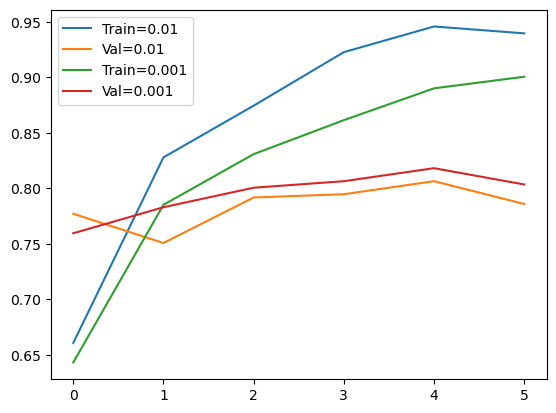

In [33]:
for lr, score in scores.items():
  plt.plot(score['accuracy'], label='Train=%s' % lr)
  plt.plot(score['val_accuracy'], label='Val=%s' % lr)

plt.xticks(np.arange(6))
plt.legend();

In [34]:
## Therefore the best learning rate is 0.001
learning_rate = 0.001

## Checkpointing

In [35]:
model.save_weights('model_v5.h5', save_format='h5')

In [36]:
checkpoint = keras.callbacks.ModelCheckpoint(
    'xception_v1_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only = True,
    monitor = 'val_accuracy',
    mode = 'max'
)

In [37]:
learning_rate = 0.001

model = make_model(learning_rate=learning_rate)

history = model.fit(
    train_ds,
    epochs=10,
    validation_data=val_ds,
    callbacks=[checkpoint]
)

Epoch 1/10
96/96 [==============================] - ETA: 0s - loss: 1.1139 - accuracy: 0.6252

/home/sreeman/anaconda3/envs/ml/lib/python3.11/site-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


96/96 [==============================] - 39s 371ms/step - loss: 1.1139 - accuracy: 0.6252 - val_loss: 0.7311 - val_accuracy: 0.7683
Epoch 2/10
96/96 [==============================] - 33s 347ms/step - loss: 0.6358 - accuracy: 0.7836 - val_loss: 0.6395 - val_accuracy: 0.7977
Epoch 3/10
96/96 [==============================] - 33s 347ms/step - loss: 0.5134 - accuracy: 0.8276 - val_loss: 0.6070 - val_accuracy: 0.8065
Epoch 4/10
96/96 [==============================] - 33s 341ms/step - loss: 0.4377 - accuracy: 0.8592 - val_loss: 0.5766 - val_accuracy: 0.8065
Epoch 5/10
96/96 [==============================] - 34s 346ms/step - loss: 0.3731 - accuracy: 0.8882 - val_loss: 0.5570 - val_accuracy: 0.8123
Epoch 6/10
96/96 [==============================] - 32s 332ms/step - loss: 0.3282 - accuracy: 0.9065 - val_loss: 0.5619 - val_accuracy: 0.8094
Epoch 7/10
96/96 [==============================] - 32s 337ms/step - loss: 0.2895 - accuracy: 0.9250 - val_loss: 0.5347 - val_accuracy: 0.8240
Epoch 8/10

## Adding more dense layers

In [38]:
def make_model(learning_rate=0.001, size_inner=100):
  base_model = Xception(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

  base_model.trainable = False

  #################################################

  inputs = keras.Input(shape=(150, 150, 3))

  base = base_model(inputs)

  vectors = keras.layers.GlobalAveragePooling2D()(base)

  inner = keras.layers.Dense(size_inner, activation='relu')(vectors)

  outputs = keras.layers.Dense(10)(inner)

  model = keras.Model(inputs, outputs)

  #################################################

  optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

  loss = keras.losses.CategoricalCrossentropy(from_logits=True)

  model.compile(optimizer=optimizer,
                loss=loss,
                metrics=['accuracy'])

  return model

In [39]:
learning_rate = 0.001

scores = {}

for size in [10, 100, 1000]:
  print(size)
  model = make_model(learning_rate=learning_rate, size_inner=size)
  history = model.fit(train_ds, epochs=10, validation_data=val_ds)
  scores[size] = history.history
  print(); print();

10
Epoch 1/10
96/96 [==============================] - 36s 338ms/step - loss: 1.5473 - accuracy: 0.4602 - val_loss: 1.1263 - val_accuracy: 0.6305
Epoch 2/10
96/96 [==============================] - 33s 340ms/step - loss: 0.9761 - accuracy: 0.6728 - val_loss: 0.9025 - val_accuracy: 0.7361
Epoch 3/10
96/96 [==============================] - 33s 342ms/step - loss: 0.7741 - accuracy: 0.7464 - val_loss: 0.7609 - val_accuracy: 0.7742
Epoch 4/10
96/96 [==============================] - 33s 347ms/step - loss: 0.6443 - accuracy: 0.7894 - val_loss: 0.7246 - val_accuracy: 0.7654
Epoch 5/10
96/96 [==============================] - 32s 335ms/step - loss: 0.5701 - accuracy: 0.8136 - val_loss: 0.6912 - val_accuracy: 0.7771
Epoch 6/10
96/96 [==============================] - 35s 359ms/step - loss: 0.4979 - accuracy: 0.8409 - val_loss: 0.6445 - val_accuracy: 0.8006
Epoch 7/10
96/96 [==============================] - 33s 347ms/step - loss: 0.4389 - accuracy: 0.8628 - val_loss: 0.6569 - val_accuracy: 0.7

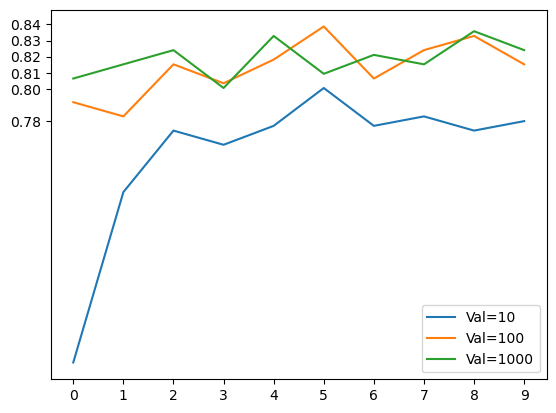

In [40]:
for lr, score in scores.items():
  # plt.plot(score['accuracy'], label='Train=%s' % lr)
  plt.plot(score['val_accuracy'], label='Val=%s' % lr)

plt.yticks([0.78, 0.80, 0.81, 0.82, 0.83, 0.84])
plt.xticks(np.arange(0, 10))
plt.legend();

## Regularization and Dropout

In [41]:
def make_model(learning_rate=0.001, size_inner=100, droprate=0.5):
  base_model = Xception(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

  base_model.trainable = False

  #################################################

  inputs = keras.Input(shape=(150, 150, 3))

  base = base_model(inputs)

  vectors = keras.layers.GlobalAveragePooling2D()(base)

  inner = keras.layers.Dense(size_inner, activation='relu')(vectors)

  drop = keras.layers.Dropout(droprate)(inner)

  outputs = keras.layers.Dense(10)(drop)

  model = keras.Model(inputs, outputs)

  #################################################

  optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

  loss = keras.losses.CategoricalCrossentropy(from_logits=True)

  model.compile(optimizer=optimizer,
                loss=loss,
                metrics=['accuracy'])

  return model

In [42]:
learning_rate = 0.001
size = 100

scores = {}

for droprate in [0.0, 0.2, 0.5, 0.8]:
  print(droprate)

  model = make_model(
      learning_rate=learning_rate,
      size_inner=size,
      droprate=droprate
  )

  history = model.fit(train_ds, epochs=20, validation_data=val_ds)
  scores[droprate] = history.history
  print(); print();

0.0
Epoch 1/20
96/96 [==============================] - 36s 338ms/step - loss: 0.9668 - accuracy: 0.6685 - val_loss: 0.6906 - val_accuracy: 0.7889
Epoch 2/20
96/96 [==============================] - 31s 322ms/step - loss: 0.5154 - accuracy: 0.8243 - val_loss: 0.6185 - val_accuracy: 0.7889
Epoch 3/20
96/96 [==============================] - 33s 340ms/step - loss: 0.3731 - accuracy: 0.8735 - val_loss: 0.5738 - val_accuracy: 0.8035
Epoch 4/20
96/96 [==============================] - 34s 355ms/step - loss: 0.2600 - accuracy: 0.9159 - val_loss: 0.7202 - val_accuracy: 0.7801
Epoch 5/20
96/96 [==============================] - 32s 328ms/step - loss: 0.1951 - accuracy: 0.9488 - val_loss: 0.5930 - val_accuracy: 0.8211
Epoch 6/20
96/96 [==============================] - 32s 334ms/step - loss: 0.1255 - accuracy: 0.9687 - val_loss: 0.6292 - val_accuracy: 0.7889
Epoch 7/20
96/96 [==============================] - 33s 342ms/step - loss: 0.0900 - accuracy: 0.9834 - val_loss: 0.6472 - val_accuracy: 0.

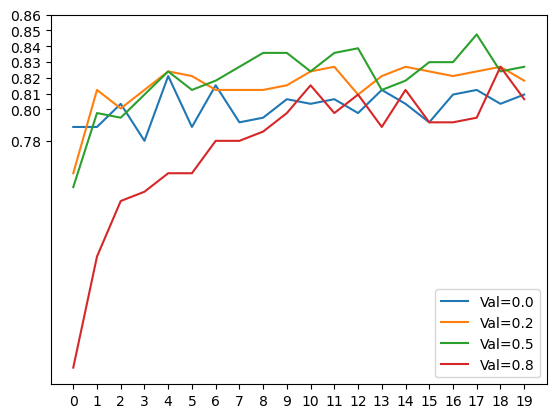

In [43]:
for dr, score in scores.items():
  # plt.plot(score['accuracy'], label='Train=%s' % lr)
  plt.plot(score['val_accuracy'], label='Val=%s' % dr)

plt.yticks([0.78, 0.80, 0.81, 0.82, 0.83, 0.84, 0.85, 0.86])
plt.xticks(np.arange(0, 20))
plt.legend();

Best Parameters So Far  
1. Learning Rate = 0.001
2. Inner Dense Layer Size = 100
3. Dropout Rate = 0.5 (20 epochs)

In [44]:
# Saving the best model obtained so far

checkpoint = keras.callbacks.ModelCheckpoint(
    'xception_v2_{epoch:02d}_{val_accuracy:.3f}.h5',
    save_best_only = True,
    monitor = 'val_accuracy',
    mode = 'max'
)

model = make_model(droprate=0.3)

history = model.fit(
    train_ds,
    epochs=20,
    validation_data=val_ds,
    callbacks=[checkpoint]
)

Epoch 1/20
96/96 [==============================] - 40s 353ms/step - loss: 1.0821 - accuracy: 0.6369 - val_loss: 0.6822 - val_accuracy: 0.7771
Epoch 2/20
96/96 [==============================] - 30s 305ms/step - loss: 0.6583 - accuracy: 0.7683 - val_loss: 0.5964 - val_accuracy: 0.7977
Epoch 3/20
96/96 [==============================] - 33s 341ms/step - loss: 0.5140 - accuracy: 0.8178 - val_loss: 0.6114 - val_accuracy: 0.7801
Epoch 4/20
96/96 [==============================] - 35s 359ms/step - loss: 0.4181 - accuracy: 0.8556 - val_loss: 0.5426 - val_accuracy: 0.8270
Epoch 5/20
96/96 [==============================] - 32s 330ms/step - loss: 0.3361 - accuracy: 0.8885 - val_loss: 0.5134 - val_accuracy: 0.8240
Epoch 6/20
96/96 [==============================] - 31s 326ms/step - loss: 0.2703 - accuracy: 0.9117 - val_loss: 0.5518 - val_accuracy: 0.7830
Epoch 7/20
96/96 [==============================] - 32s 329ms/step - loss: 0.2453 - accuracy: 0.9143 - val_loss: 0.5388 - val_accuracy: 0.8211

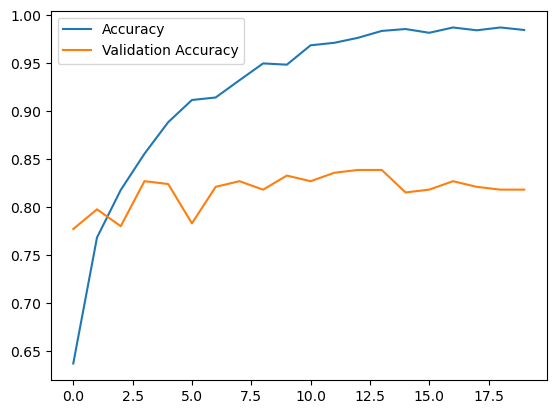

In [45]:
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

plt.legend();